Exploratory Data Analysis & Behavioral Pattern Analysis

Dataset: IoT-Enhanced E-Learning Dataset
<!-- Source: https://www.kaggle.com/datasets/ziya07/iot-enhanced-e-learning-dataset -->

Libraries Used

In [59]:
import  pandas as pd
import  numpy as numpy
import  matplotlib.pyplot as plt

Load the Dataset

In [60]:
df = pd.read_csv("student_engagement_data_10000.csv")
df.head()

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93


<h3> Exploratory Data Analysis (EDA)</h3>
 Basic Summary Statistics
 Objective

Get an overview of the dataset, data types, distributions, and missing values.

 Dataset Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


Statistical Summary

In [62]:
df.describe()

,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


Missing Values Count

In [63]:
df.isnull().sum()

Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

Value Counts for Categorical Columns

In [64]:
df["Learning Mode Prediction"].value_counts()
df["Student ID"].value_counts().head(10)

Student ID
1       1
6671    1
6664    1
6665    1
6666    1
6667    1
6668    1
6669    1
6670    1
6672    1
Name: count, dtype: int64

<h3>Observations</h3>

Dataset contains both numerical and categorical data.

Engagement and attention are continuous variables.

Learning mode includes multiple teaching styles.

No major missing values detected (if present, they can be handled).

<h3>Daily Average Engagement and Attention
 Objective</h3>

Analyze how student engagement and attention change on a daily basis.</h3>

<h3>Convert Date Column<h3>

In [65]:
df["Date"] = pd.to_datetime(df["Date"])


<h3>Daily Averages</h3>

In [73]:
df['Engagement Level'] = pd.to_numeric(df['Engagement Level'], errors='coerce')
df['Attention Level'] = pd.to_numeric(df['Attention Level'], errors='coerce')

In [75]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [80]:
daily_avg = df.groupby('Date')[['Engagement Level', 'Attention Level']].mean()
daily_avg.head()


,Engagement Level,Attention Level
Date,,
2025-01-01,NaN,NaN
2025-01-02,NaN,NaN
2025-01-03,NaN,NaN
2025-01-04,NaN,NaN
2025-01-05,NaN,NaN


<h3>Line Plot for Daily Trends</h3>

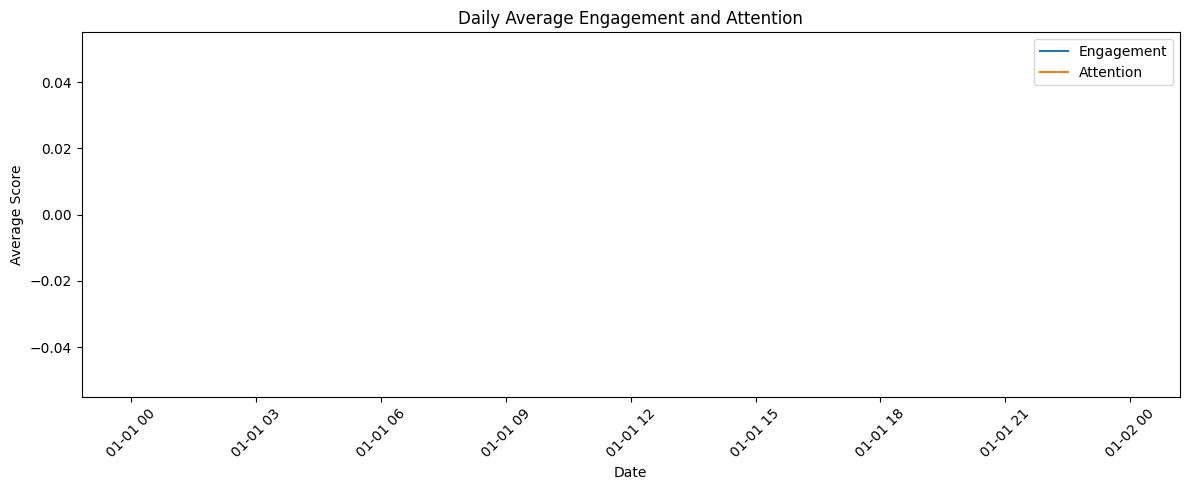

In [83]:
plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg['Engagement Level'], label='Engagement')
plt.plot(daily_avg.index, daily_avg['Attention Level'], label='Attention')

plt.xlabel("Date")
plt.ylabel("Average Score")
plt.title("Daily Average Engagement and Attention")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights
<p>Engagement and attention show daily fluctuations.
Certain days reflect higher learning involvement.
Trends can help detect burnout or peak learning days </p>

Most and Least Engaged Students
 <h3>Objective</h3>

Identify students with consistently high or low engagement.

<h3>Average Engagement per Student</h3>

In [85]:
student_engagement = df.groupby('Student ID')['Engagement Level'].mean()


<h3>Top 10 Engaged Students</h3>

In [86]:
top_10 = student_engagement.sort_values(ascending=False).head(10)


<h3>Bottom 10 Engaged Students</h3>

In [87]:
bottom_10 = student_engagement.sort_values().head(10)


<h3>Visualization</h3>

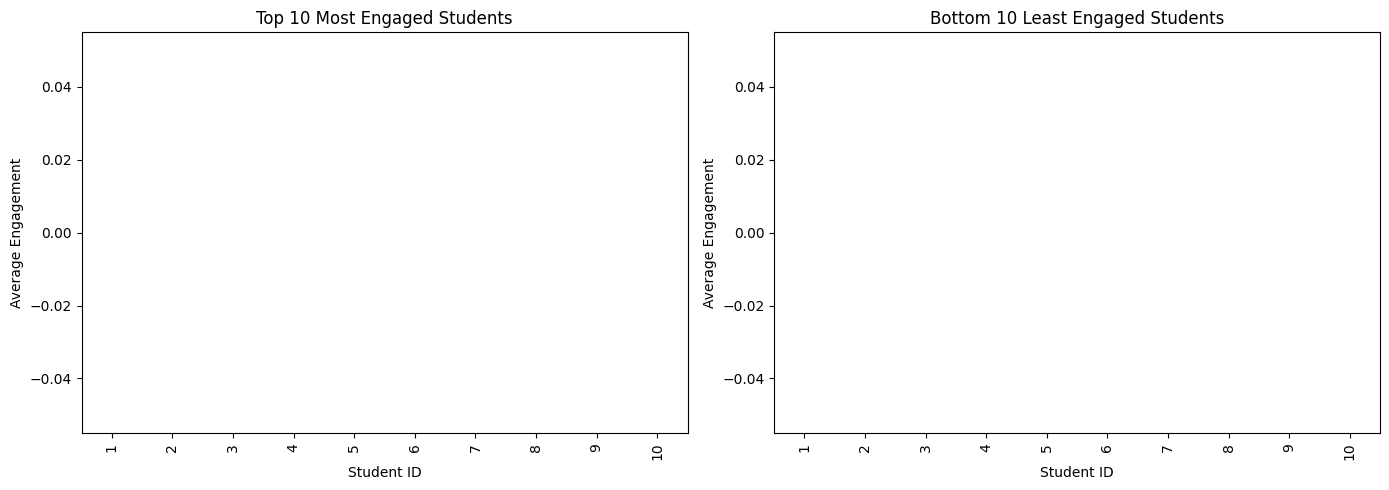

In [88]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
top_10.plot(kind='bar', title='Top 10 Most Engaged Students')
plt.ylabel("Average Engagement")

plt.subplot(1,2,2)
bottom_10.plot(kind='bar', title='Bottom 10 Least Engaged Students')
plt.ylabel("Average Engagement")

plt.tight_layout()
plt.show()


Insights

Top students show consistently high participation.

Bottom students may require intervention or personalized support.

Behavioral Pattern Analysis
Engagement by Learning Mode

 Objective

Determine which learning mode results in higher engagement.

<h3>Average Engagement per Learning Mode<h3>

In [92]:
mode_engagement = df.groupby('Learning Mode Prediction')['Engagement Level'].mean()
mode_engagement


Learning Mode Prediction
Auditory Learner      NaN
Kinesthetic Learner   NaN
Visual Learner        NaN
Name: Engagement Level, dtype: float64

<h3>Bar Chart Comparison</h3>

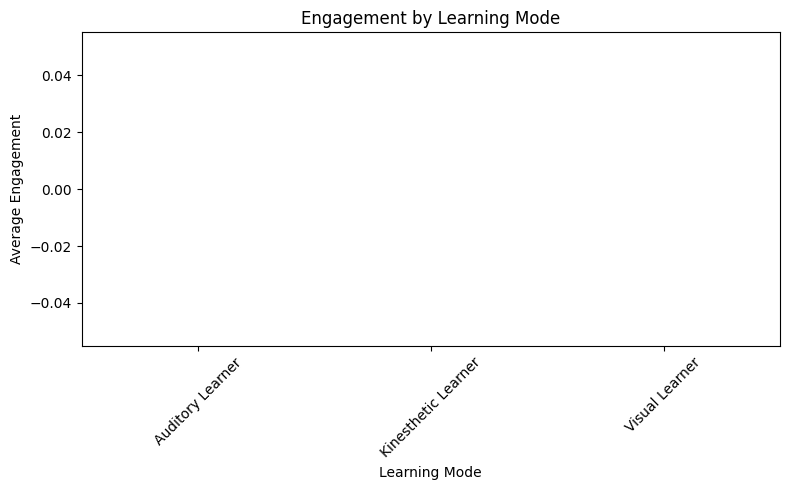

In [93]:
plt.figure(figsize=(8,5))
mode_engagement.plot(kind='bar', color='skyblue')

plt.xlabel("Learning Mode")
plt.ylabel("Average Engagement")
plt.title("Engagement by Learning Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
